# **PyTorch**

Библиотека в Python для научных вычислений. Две основных цели:

* Замена NumPy для использования GPUs
* Платформа для глубинного обучения с высокой гибкостью и скоростью

# План занятия

* Что такое тензоры
* Строим модель линейной регрессии с помощью PyTorch
* Строим модель логистической регрессии с помощью  PyTorch

In [ ]:
import numpy as np
import torch
from torch.autograd import Variable

## **Тензоры**

Тензоры - как массивы в NumPy. Но они могут эффективно использоваться на GPU.


**Создание тензора**

Создадим пустой тензор размера 5 на 4 или тензор со случайными элементами.

In [ ]:
x = torch.empty(5, 4)
print(x)

tensor([[8.5448e+05, 3.0882e-41, 7.0065e-44, 6.8664e-44],
        [6.3058e-44, 6.7262e-44, 7.2868e-44, 6.3058e-44],
        [6.7262e-44, 7.4269e-44, 1.1771e-43, 6.8664e-44],
        [7.4269e-44, 8.1275e-44, 7.0065e-44, 7.8473e-44],
        [8.1275e-44, 7.2868e-44, 7.4269e-44, 6.4460e-44]])


In [ ]:
x = torch.rand(5, 3)
print(x)

tensor([[0.0415, 0.0418, 0.9237],
        [0.4190, 0.2177, 0.2448],
        [0.5352, 0.2411, 0.6905],
        [0.1614, 0.9138, 0.4381],
        [0.8698, 0.6578, 0.7627]])


Создадим тензор, заполненный нулями с типом long:

In [ ]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


Создадим тензор из массива

In [ ]:
y_numpy = np.random.rand(5, 3)
x = torch.tensor(y_numpy)
print(y_numpy)
print(x)

[[0.70337497 0.76866973 0.95935794]
 [0.7952345  0.5849783  0.58515958]
 [0.55587818 0.85376818 0.4595871 ]
 [0.88461404 0.37486089 0.13661277]
 [0.14590512 0.91448336 0.86498481]]
tensor([[0.7034, 0.7687, 0.9594],
        [0.7952, 0.5850, 0.5852],
        [0.5559, 0.8538, 0.4596],
        [0.8846, 0.3749, 0.1366],
        [0.1459, 0.9145, 0.8650]], dtype=torch.float64)


**Методы работы с тензорами**

Создадим тензор и посмотрим, какие методы и атрбиты у него есть

In [ ]:
# Создадим тензор
# torch.manual_seed(0)
x = torch.rand(3, 2)

In [ ]:
x_size = x.size()
print(x_size)
print(x_size[0], x_size[1]) # возвращает tuple - неизменяемый лист значений

torch.Size([3, 2])
3 2


In [ ]:
y = torch.rand(3, 2)
print(x + y) # можно складывать матрицы

tensor([[0.5419, 0.7170],
        [0.9353, 1.2134],
        [0.8357, 0.6486]])


In [ ]:
print(torch.add(x, y)) # есть отдельная операция для сложения (в numpy тоже такая есть)

tensor([[0.5419, 0.7170],
        [0.9353, 1.2134],
        [0.8357, 0.6486]])


In [ ]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[0.5419, 0.7170],
        [0.9353, 1.2134],
        [0.8357, 0.6486]])


<ipython-input-14-be44516bcd9b>:2: UserWarning: An output with one or more elements was resized since it had shape [5, 3], which does not match the required output shape [3, 2].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ..\aten\src\ATen\native\Resize.cpp:19.)
  torch.add(x, y, out=result)


In [ ]:
__dict__

In [ ]:
# можем делать много чего еще
y.add_(x)
print(y)

tensor([[3.2488, 3.4514],
        [1.9527, 2.5150],
        [3.3842, 0.9096]])


In [ ]:
# индексация совпадает с таковой в numpy
print(x[:, 1])

tensor([0.5469, 0.2603, 0.0522])


In [ ]:
# Для изменения размера тензора используем  torch.view:

x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # размер в первой позиции 
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [ ]:
# Можно использовать __.item()__ для того, чтобы извлечь значение 
# из тензора размера 1 на 1

x = torch.randn(1)
print(x)
print(x.item())

tensor([-1.2196])
-1.2196472883224487


Больше информации о тензорах есть в документации
https://pytorch.org/docs/stable/torch.html

## **Перемещение и преобразование pytorch.tensor()**

**В numpy и обратно**

In [ ]:
a = torch.ones(4)
print(a)

tensor([1., 1., 1., 1.])


In [ ]:
# из тензора можно сделать numpy array
b = a.numpy()
print(b)

[1. 1. 1. 1.]


In [ ]:
# объекты остаются лежать в одной и той же области памяти
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2.])
[2. 2. 2. 2.]


In [ ]:
# преобразование можно делать и в обратную сторону
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


**Перемещение в память устройства**

In [ ]:
# проверим, доступна ли CUDA (GPU)
print(torch.cuda.is_available())

True


In [ ]:
# теперь попробуем перемещать массивы из памяти CPU в память GPU
x = torch.randn(4, 4)
device = torch.device("cuda:0")        # наше устройство с CUDA
y = torch.ones_like(x, device=device)  # создать тензор сразу на устройстве GPU
x = x.to(device)                       # или переместим на устройство ``.to("cuda")``
z = x + y
print(z)
print(z.to("cpu", torch.double))       # ``.to`` позволяет менять тип

tensor([[ 1.2830,  1.9322,  0.2625, -0.1267],
        [-0.5638,  1.4110, -0.5280,  0.6161],
        [ 1.6653,  0.8847,  0.9666,  0.4223],
        [ 0.6835,  1.9330,  0.0549,  0.1737]], device='cuda:0')
tensor([[ 1.2830,  1.9322,  0.2625, -0.1267],
        [-0.5638,  1.4110, -0.5280,  0.6161],
        [ 1.6653,  0.8847,  0.9666,  0.4223],
        [ 0.6835,  1.9330,  0.0549,  0.1737]], dtype=torch.float64)


In [ ]:
# зачем нам вообще работать на GPU? Потому что это быстрее!
# пробуем использовать tensor на CPU
x = torch.rand(5, 64)
y = torch.rand(64, 5000)
%timeit z = (x @ y).sum(dim=1)

# пробуем использовать tensor на GPU
x, y = x.cuda(), y.cuda()
%timeit z = (x @ y).sum(dim=1)

# сравним с numpy
x = np.random.random((5, 64))
y = np.random.random((64, 5000))
%timeit z = (x @ y).sum(axis=1)

The slowest run took 187.39 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 87.3 µs per loop
The slowest run took 534.95 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 18.1 µs per loop
The slowest run took 9.61 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 463 µs per loop


## **Автоматическое дифференцирование**

In [ ]:
# с помощью requires_grad говорим pytorch, что там нужны градиенты
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [ ]:
# теперь у других переменных мы следим за зависимостями от исходных переменных
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [ ]:
# можно посмотреть на эту функцию в явном виде
print(y.grad_fn)

In [ ]:
# получим теперь одно число out, которое будет функцией x
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [ ]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

# можно менять атрибут requires_grad в процессе работы
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
None
True


**Как считать производные**

In [ ]:
# сначала запустим backward
out.backward()

In [ ]:
# теперь знаем частные производные out по x
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [ ]:
x = torch.tensor([1., 2., 3.], requires_grad=True)

In [ ]:
y = x * 2
z = x * 3

In [ ]:
w = torch.tensor([0.5, 1.0, 0.0001], dtype=torch.float)
z.backward(w)
print(x.grad)
x.grad = torch.zeros_like(x.grad)

v = torch.tensor([0.2, 1.0, 0.0001], dtype=torch.float)
y.backward(v)
print(x.grad)

tensor([1.0390e+02, 5.1500e+02, 5.1500e-02])
tensor([4.0000e-01, 2.0000e+00, 2.0000e-04])


In [ ]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


## Линейная регрессия с помощью PyTorch

In [ ]:
from sklearn import datasets, model_selection
import matplotlib.pyplot as plt

In [ ]:
# Загрузим стандартный набор данных, доступный в sklearn. 
# Для этой выборки будем строить линейную регрессионную модель. 
boston_data = datasets.load_boston()

# отделим входы и выходы
points = boston_data['data']
values = boston_data['target'].reshape(-1, 1)


# разобьем выборку на обучающую и тестовую
training_points, test_points, training_values, test_values = model_selection.train_test_split(
    points, values, test_size=0.33, random_state=42)

In [ ]:
# зададим класс для линейной регрессии. Мы наследуем его от torch.nn.Module
# нам нужны две функции: 
# * __init__ определяет, как мы создаем объект этого класса
# * forward определяет, как мы делаем прогноз

class linearRegression(torch.nn.Module):
  # инициализация объекта класса
  def __init__(self, input_dimension, output_dimension):
    # сначала запустим init аналогичный родительскому классу
    super(linearRegression, self).__init__() 
    # затем создадим свой первый слой на pytorch
    # так как модель у нас линейная, то и слой линейный
    self.linear = torch.nn.Linear(input_dimension, output_dimension)

  # подсчет прогноза
  def forward(self, x):
    out = self.linear(x)
    return out

In [ ]:
# инициализируем объект нашего класса, получив сперва размерности 
input_dimension = training_points.shape[1]
output_dimension = 1

model = linearRegression(input_dimension, output_dimension)

# используем GPU, чтобы все считалось быстрее
if torch.cuda.is_available():
    model.cuda()

In [ ]:
[w for w in model.parameters()]

[Parameter containing:
 tensor([[ 0.2405,  0.0891,  0.0022, -0.2657,  0.2016,  0.0700,  0.1110,  0.1862,
           0.0011, -0.1874,  0.1421,  0.2117,  0.1580]], device='cuda:0',
        requires_grad=True),
 Parameter containing:
 tensor([-0.0612], device='cuda:0', requires_grad=True)]

In [ ]:
# определим, что мы будем оптимизировать и как
learning_rate = 1e-3

# будем минимизировать квадратичную функцию потерь
criterion = torch.nn.MSELoss()
# с помощью алгоритма ADAM (дальше посмотрим на разные алгоритмы оптимизации подробнее)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
epochs = 2000

# входные и выходные матрицы сконевртируем в тензоры
if torch.cuda.is_available():
    inputs = torch.from_numpy(training_points).type(torch.float).cuda()
    outputs = torch.from_numpy(training_values).type(torch.float).cuda()
else:
    inputs = torch.from_numpy(training_points)
    outputs = torch.from_numpy(training_values)

for epoch in range(epochs):
    # нужно обнулить градиенты, иначе будет их аккумулировать
    optimizer.zero_grad()

    # получим выход модели с учетом наличия входов
    training_predictions = model(inputs)

    # получим значение функции потерь для полученных прогнозов
    loss_value = criterion(training_predictions, outputs)
    # подсчитаем градиенты
    loss_value.backward()

    # сделаем апдейт параметров
    optimizer.step()

    if epoch % 100 == 1:
        print('epoch {}, loss {}'.format(epoch, loss_value.item()))

epoch 1, loss 1405.087158203125
epoch 101, loss 342.981201171875
epoch 201, loss 147.70863342285156
epoch 301, loss 106.92498779296875
epoch 401, loss 90.6817855834961
epoch 501, loss 80.91046905517578
epoch 601, loss 73.45337677001953
epoch 701, loss 67.3121337890625
epoch 801, loss 62.16395950317383
epoch 901, loss 57.81874465942383
epoch 1001, loss 54.13913345336914
epoch 1101, loss 51.02271270751953
epoch 1201, loss 48.389251708984375
epoch 1301, loss 46.1712760925293
epoch 1401, loss 44.30875015258789
epoch 1501, loss 42.74691390991211
epoch 1601, loss 41.435787200927734
epoch 1701, loss 40.33039474487305
epoch 1801, loss 39.391136169433594
epoch 1901, loss 38.58393859863281


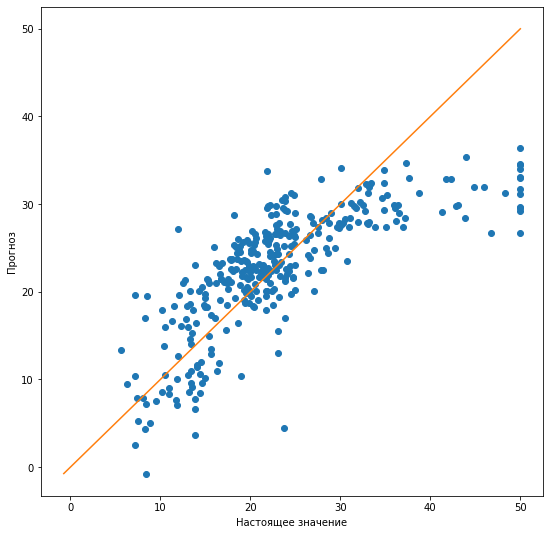

In [ ]:
# сравним настоящие значения и прогнозы для обучающей выборки
training_predictions = training_predictions.cpu().data.numpy()

plt.figure(figsize=(9, 9))
plt.plot(training_values, training_predictions, 'o');
plt.plot([np.min(training_predictions), np.max(training_values)], 
         [np.min(training_predictions), np.max(training_values)])
plt.xlabel('Настоящее значение')
plt.ylabel('Прогноз');

In [ ]:
# Получим прогноз для тестовой выборки
with torch.no_grad():
    if torch.cuda.is_available():
        test_predictions = model(torch.from_numpy(test_points).type(torch.float).cuda()).cpu().data.numpy()
    else:
        test_predictions = model(torch.from_numpy(test_points)).type(torch.float).data.numpy()

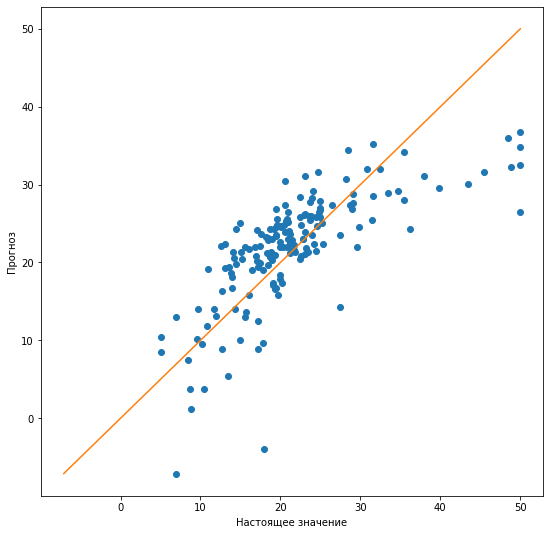

In [ ]:
# TODO сравним настоящие значения и прогнозы для обучающей выборки
plt.figure(figsize=(9, 9))
plt.plot(test_values, test_predictions, 'o');
plt.plot([np.min(test_predictions), np.max(test_values)], 
         [np.min(test_predictions), np.max(test_values)])
plt.xlabel('Настоящее значение')
plt.ylabel('Прогноз');

## **Логистическая регрессия с помощью PyTorch**

In [ ]:
# Загрузим данные по предсказанию рака груди
breast_cancer_data = datasets.load_breast_cancer()

points = breast_cancer_data['data']
labels = breast_cancer_data['target'].reshape(-1, 1)
training_points, test_points, training_labels, test_labels = model_selection.train_test_split(
    points, labels, test_size=0.33, random_state=42)

In [ ]:
# TODO создадим класс для логистической регрессии
class logisticRegression(torch.nn.Module):
    def __init__(self, input_dimension, output_dimension):
        super(logisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dimension, output_dimension)

    def forward(self, x):
        out = self.linear(x)
        return out

In [ ]:
# инициализируем объект нашего класса, получив сперва размерности 
input_dimension = training_points.shape[1]
output_dimension = 1

logistic_regression_model = logisticRegression(input_dimension, output_dimension)

# используем GPU, чтобы все считалось быстрее
if torch.cuda.is_available():
    logistic_regression_model.cuda()

In [ ]:
# определим, что мы будем оптимизировать и как
learning_rate = 1e-2

# инициализируем нулями веса логистической регрессии
torch.nn.init.constant_(logistic_regression_model.linear.weight, 0)

# будем минимизировать логистическую функцию потерь
criterion = torch.nn.BCEWithLogitsLoss(size_average=True)
# с помощью алгоритма ADAM (дальше посмотрим на разные алгоритмы оптимизации подробнее)
optimizer = torch.optim.Adam(logistic_regression_model.parameters(), lr=learning_rate)

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [ ]:
epochs = 2000

# входные и выходные матрицы сконевртируем в тензоры
if torch.cuda.is_available():
    inputs = Variable(torch.from_numpy(training_points).type(torch.float).cuda())
    outputs = Variable(torch.from_numpy(training_labels).type(torch.float).cuda())
else:
    inputs = Variable(torch.from_numpy(training_points).type(torch.float))
    outputs = Variable(torch.from_numpy(training_labels).type(torch.float))

for epoch in range(epochs):
    # нужно обнулить градиенты, иначе будет их аккумулировать
    optimizer.zero_grad()

    # получим выход модели с учетом наличия входов
    training_predictions = logistic_regression_model(inputs)

    # получим значение функции потерь для полученных прогнозов
    loss_value = criterion(training_predictions, outputs)
    # подсчитаем градиенты
    loss_value.backward()

    # сделаем апдейт параметров
    optimizer.step()

    if epoch % 100 == 1:
        print('epoch {}, loss {}'.format(epoch, loss_value.item()))

epoch 1, loss 5.134042739868164
epoch 101, loss 0.22277499735355377
epoch 201, loss 0.1871049553155899
epoch 301, loss 0.16426105797290802
epoch 401, loss 0.14741481840610504
epoch 501, loss 0.134878009557724
epoch 601, loss 0.1254711002111435
epoch 701, loss 0.11828348785638809
epoch 801, loss 0.11264032125473022
epoch 901, loss 0.1080738976597786
epoch 1001, loss 0.10427065193653107
epoch 1101, loss 0.10102133452892303
epoch 1201, loss 0.09818503260612488
epoch 1301, loss 0.09566515684127808
epoch 1401, loss 0.09339410811662674
epoch 1501, loss 0.09132342040538788
epoch 1601, loss 0.08941781520843506
epoch 1701, loss 0.08765087276697159
epoch 1801, loss 0.08600243926048279
epoch 1901, loss 0.0844569131731987


## Оценка качества построенной модели

Мы сравним качество полученной модели с качеством модели логистической регрессии из sklearn с помощью метрики ROCAUC.

In [ ]:
# импортируем нужные модели
from sklearn import metrics, linear_model

In [ ]:
# считаем прогнозы
with torch.no_grad():
    if torch.cuda.is_available():
        test_predictions = logistic_regression_model(Variable(torch.from_numpy(test_points).type(torch.float).cuda())).cpu().data.numpy()
    else:
        test_predictions = logistic_regression_model(Variable(torch.from_numpy(test_points))).type(torch.float).data.numpy()

In [ ]:
sklearn_logistic_regression_model = linear_model.LogisticRegression()

In [ ]:
sklearn_logistic_regression_model.fit(training_points, training_labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
sklearn_test_predictions = sklearn_logistic_regression_model.predict_proba(test_points)[:, 1]

In [ ]:
# считаем ROC AUC для двух моделей
metrics.roc_auc_score(test_labels, test_predictions)

0.9969162452201801

In [ ]:
metrics.roc_auc_score(test_labels, sklearn_test_predictions)

0.9975329961761441

# Практика

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# накидываем тысячу точек от -3 до 3
x = np.linspace(-3, 3, 1000).reshape(-1, 1)

# задаём линейную функцию, которую попробуем приблизить нашей нейронной сетью
def f(x):    
    return 2 * x + 5

In [ ]:
f = np.vectorize(f)

# вычисляем вектор значений функции
y = f(x)

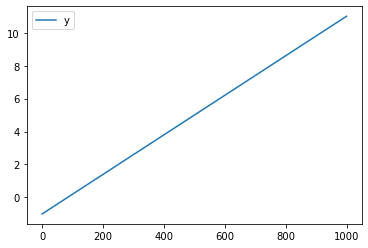

In [ ]:
plt.plot(y)
plt.legend('y')

In [ ]:
# зададим класс для линейной регрессии. Мы наследуем его от torch.nn.Module
# нам нужны две функции: 
# * __init__ определяет, как мы создаем объект этого класса
# * forward определяет, как мы делаем прогноз

class linearRegression(torch.nn.Module):
  # инициализация объекта класса
    def __init__(self, input_dimension, output_dimension):
        # сначала запустим init аналогичный родительскому классу
        super(linearRegression, self).__init__() 
        # затем создадим свой первый слой на pytorch
        # так как модель у нас линейная, то и слой линейный
        self.linear = torch.nn.Linear(input_dimension, output_dimension)

  # подсчет прогноза
    def forward(self, x):
        out = self.linear(x)
        return out

    def predict(self, test):
        return self.__call__(test)

In [ ]:
# инициализируем объект нашего класса, получив сперва размерности 
input_dimension = y.shape[1]
output_dimension = 1

model = linearRegression(input_dimension, output_dimension)

# используем GPU, чтобы все считалось быстрее
if torch.cuda.is_available():
    model.cuda()

In [ ]:
model.__dict__

{'training': True,
 '_parameters': OrderedDict(),
 '_buffers': OrderedDict(),
 '_non_persistent_buffers_set': set(),
 '_backward_hooks': OrderedDict(),
 '_is_full_backward_hook': None,
 '_forward_hooks': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_state_dict_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_modules': OrderedDict([('linear',
               Linear(in_features=1, out_features=1, bias=True))])}

In [ ]:
# определим, что мы будем оптимизировать и как
learning_rate = 1e-2

# будем минимизировать квадратичную функцию потерь
criterion = torch.nn.MSELoss()
# с помощью алгоритма ADAM (дальше посмотрим на разные алгоритмы оптимизации подробнее)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
epochs = 1000

# входные и выходные матрицы сконевртируем в тензоры
if torch.cuda.is_available():
    inputs = Variable(torch.from_numpy(x).type(torch.float).cuda())
    outputs = Variable(torch.from_numpy(y).type(torch.float).cuda())
else:
    inputs = Variable(torch.from_numpy(x))
    outputs = Variable(torch.from_numpy(y))

for epoch in range(epochs):
  # нужно обнулить градиенты, иначе будет их аккумулировать
  optimizer.zero_grad()

  # получим выход модели с учетом наличия входов
  training_predictions = model(inputs)

  # получим значение функции потерь для полученных прогнозов
  loss_value = criterion(training_predictions, outputs)
  # подсчитаем градиенты
  loss_value.backward()

  # сделаем апдейт параметров
  optimizer.step()
  
  if epoch % 100 == 1:
    print('epoch {}, loss {}'.format(epoch, loss_value.item()))

epoch 1, loss 10.1619234085083
epoch 101, loss 5.763704299926758
epoch 201, loss 3.1448309421539307
epoch 301, loss 1.606860637664795
epoch 401, loss 0.7616341710090637
epoch 501, loss 0.3330865502357483
epoch 601, loss 0.1338312178850174
epoch 701, loss 0.04922310262918472
epoch 801, loss 0.016517026349902153
epoch 901, loss 0.0050397953018546104


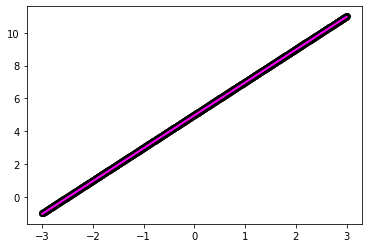

In [ ]:
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(inputs).detach().cpu().numpy(), color='magenta', linewidth=2, antialiased=True)
plt.show()

In [ ]:
model.linear._parameters

OrderedDict([('weight',
              Parameter containing:
              tensor([[2.0000]], device='cuda:0', requires_grad=True)),
             ('bias',
              Parameter containing:
              tensor([4.9624], device='cuda:0', requires_grad=True))])

In [ ]:
def f(x):    
    return 2 * np.sin(x) + 5

In [ ]:
y = f(x)

In [ ]:
model._modules

OrderedDict([('linear', Linear(in_features=1, out_features=1, bias=True))])

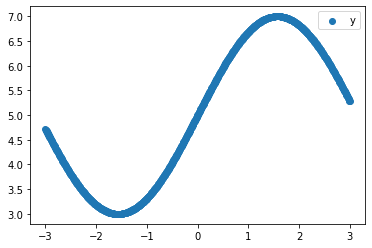

In [ ]:
plt.scatter(x, y)
plt.legend('y')

In [ ]:
# инициализируем объект нашего класса, получив сперва размерности 
input_dimension = y.shape[1]
output_dimension = 1

model = linearRegression(input_dimension, output_dimension)

# используем GPU, чтобы все считалось быстрее
if torch.cuda.is_available():
    model.cuda()

In [ ]:
# определим, что мы будем оптимизировать и как
learning_rate = 1e-2

# будем минимизировать квадратичную функцию потерь
criterion = torch.nn.MSELoss()
# с помощью алгоритма ADAM (дальше посмотрим на разные алгоритмы оптимизации подробнее)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
epochs = 1000

# входные и выходные матрицы сконевртируем в тензоры
if torch.cuda.is_available():
    inputs = Variable(torch.from_numpy(x).type(torch.float).cuda())
    outputs = Variable(torch.from_numpy(y).type(torch.float).cuda())
else:
    inputs = Variable(torch.from_numpy(x))
    outputs = Variable(torch.from_numpy(y))

for epoch in range(epochs):
  # нужно обнулить градиенты, иначе будет их аккумулировать
  optimizer.zero_grad()

  # получим выход модели с учетом наличия входов
  training_predictions = model(inputs)

  # получим значение функции потерь для полученных прогнозов
  loss_value = criterion(training_predictions, outputs)
  # подсчитаем градиенты
  loss_value.backward()

  # сделаем апдейт параметров
  optimizer.step()
  
  if epoch % 100 == 1:
    print('epoch {}, loss {}'.format(epoch, loss_value.item()))

epoch 1, loss 26.68116569519043
epoch 101, loss 17.692747116088867
epoch 201, loss 11.333208084106445
epoch 301, loss 7.004435062408447
epoch 401, loss 4.214919567108154
epoch 501, loss 2.526259422302246
epoch 601, loss 1.5730265378952026
epoch 701, loss 1.0745288133621216
epoch 801, loss 0.8343121409416199
epoch 901, loss 0.7280933260917664


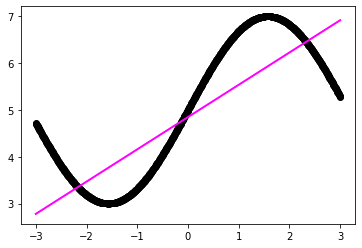

In [ ]:
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(inputs).detach().cpu().numpy(), color='magenta', linewidth=2, antialiased=True)
plt.show()

In [ ]:
model.linear._parameters

OrderedDict([('weight',
              Parameter containing:
              tensor([[0.6896]], device='cuda:0', requires_grad=True)),
             ('bias',
              Parameter containing:
              tensor([4.8463], device='cuda:0', requires_grad=True))])

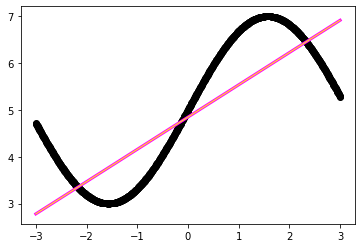

In [ ]:
def line(x):
    w = model.linear.weight.item()
    b = model.linear.bias.item()
    
    return w * x + b

# отрисовываем результат приближения нейросетью поверх исходной функции
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(inputs).detach().cpu().numpy(), color='magenta', linewidth=3, antialiased=True)
plt.plot(x, line(x), color='yellow', linewidth=1, antialiased=True)
plt.show()

In [ ]:
# зададим класс для линейной регрессии. Мы наследуем его от torch.nn.Module
# нам нужны две функции: 
# * __init__ определяет, как мы создаем объект этого класса
# * forward определяет, как мы делаем прогноз

class linearRegression(torch.nn.Module):
  # инициализация объекта класса
    def __init__(self, input_dimension, output_dimension):
        # сначала запустим init аналогичный родительскому классу
        super(linearRegression, self).__init__() 
        # затем создадим свой первый слой на pytorch
        # так как модель у нас линейная, то и слой линейный
        self.linear1 = torch.nn.Linear(input_dimension, 5)
        self.linear2 = torch.nn.Linear(5, output_dimension)

  # подсчет прогноза
    def forward(self, x):
        out = self.linear1(x)
        return self.linear2(out)

    def predict(self, test):
        return self.__call__(test)

In [ ]:
# инициализируем объект нашего класса, получив сперва размерности 
input_dimension = y.shape[1]
output_dimension = 1

model = linearRegression(input_dimension, output_dimension)

# используем GPU, чтобы все считалось быстрее
if torch.cuda.is_available():
    model.cuda()

In [ ]:
# определим, что мы будем оптимизировать и как
learning_rate = 1e-2

# будем минимизировать квадратичную функцию потерь
criterion = torch.nn.MSELoss()
# с помощью алгоритма ADAM (дальше посмотрим на разные алгоритмы оптимизации подробнее)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
epochs = 1000

# входные и выходные матрицы сконевртируем в тензоры
if torch.cuda.is_available():
    inputs = Variable(torch.from_numpy(x).type(torch.float).cuda())
    outputs = Variable(torch.from_numpy(y).type(torch.float).cuda())
else:
    inputs = Variable(torch.from_numpy(x))
    outputs = Variable(torch.from_numpy(y))

for epoch in range(epochs):
  # нужно обнулить градиенты, иначе будет их аккумулировать
  optimizer.zero_grad()

  # получим выход модели с учетом наличия входов
  training_predictions = model(inputs)

  # получим значение функции потерь для полученных прогнозов
  loss_value = criterion(training_predictions, outputs)
  # подсчитаем градиенты
  loss_value.backward()

  # сделаем апдейт параметров
  optimizer.step()
  
  if epoch % 100 == 1:
    print('epoch {}, loss {}'.format(epoch, loss_value.item()))

epoch 1, loss 25.933300018310547
epoch 101, loss 0.6791734099388123
epoch 201, loss 0.6617746949195862
epoch 301, loss 0.6617746949195862
epoch 401, loss 0.6617746353149414
epoch 501, loss 0.6617746949195862
epoch 601, loss 0.6617746949195862
epoch 701, loss 0.6617746949195862
epoch 801, loss 0.6617746949195862
epoch 901, loss 0.6617746949195862


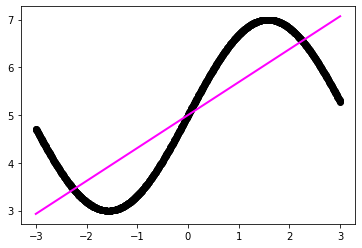

In [ ]:
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(inputs).detach().cpu().numpy(), color='magenta', linewidth=2, antialiased=True)
plt.show()

In [ ]:
model.linear1.weight, model.linear1.bias

(Parameter containing:
 tensor([[-0.7301],
         [ 0.7268],
         [ 0.1841],
         [-0.1715],
         [-0.0193]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([-1.5202,  0.2412, -1.3658,  1.0280,  1.6380], device='cuda:0',
        requires_grad=True))

Всё дело в том, что архитектура нашей сети сводится к линейной комбинации линейных функций: <br>
f(x) = w1' * (w1 * x + b1) +… + w5' (w5 * x + b5) + b <br>
Т.е. опять же является линейной функцией. Чтобы сделать поведение нашей сети более интересным, добавим нейронам внутреннего слоя функцию активации ReLU (выпрямитель, f(x) = max(0, x)), которая позволяет сети ломать прямую на сегменты:

In [ ]:
# зададим класс для линейной регрессии. Мы наследуем его от torch.nn.Module
# нам нужны две функции: 
# * __init__ определяет, как мы создаем объект этого класса
# * forward определяет, как мы делаем прогноз

class linearRegression(torch.nn.Module):
  # инициализация объекта класса
    def __init__(self, input_dimension, output_dimension):
        # сначала запустим init аналогичный родительскому классу
        super(linearRegression, self).__init__() 
        # затем создадим свой первый слой на pytorch
        # так как модель у нас линейная, то и слой линейный
        self.linear1 = torch.nn.Linear(input_dimension, 15)
        self.linear2 = torch.nn.Linear(15, output_dimension)

  # подсчет прогноза
    def forward(self, x):
        out = self.linear1(x)
        out = torch.nn.functional.relu(out)
        return self.linear2(out)

    def predict(self, test):
        return self.__call__(test)

In [ ]:
# инициализируем объект нашего класса, получив сперва размерности 
input_dimension = y.shape[1]
output_dimension = 1

model = linearRegression(input_dimension, output_dimension)

# используем GPU, чтобы все считалось быстрее
if torch.cuda.is_available():
    model.cuda()

In [ ]:
# определим, что мы будем оптимизировать и как
learning_rate = 1e-2

# будем минимизировать квадратичную функцию потерь
criterion = torch.nn.MSELoss()
# с помощью алгоритма ADAM (дальше посмотрим на разные алгоритмы оптимизации подробнее)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
epochs = 1000

# входные и выходные матрицы сконевртируем в тензоры
if torch.cuda.is_available():
    inputs = Variable(torch.from_numpy(x).type(torch.float).cuda())
    outputs = Variable(torch.from_numpy(y).type(torch.float).cuda())
else:
    inputs = Variable(torch.from_numpy(x))
    outputs = Variable(torch.from_numpy(y))

for epoch in range(epochs):
  # нужно обнулить градиенты, иначе будет их аккумулировать
  optimizer.zero_grad()

  # получим выход модели с учетом наличия входов
  training_predictions = model(inputs)

  # получим значение функции потерь для полученных прогнозов
  loss_value = criterion(training_predictions, outputs)
  # подсчитаем градиенты
  loss_value.backward()

  # сделаем апдейт параметров
  optimizer.step()
  
  if epoch % 100 == 1:
    print('epoch {}, loss {}'.format(epoch, loss_value.item()))

epoch 1, loss 25.94715690612793
epoch 101, loss 0.8069921731948853
epoch 201, loss 0.33723652362823486
epoch 301, loss 0.11965460330247879
epoch 401, loss 0.03595784679055214
epoch 501, loss 0.017643099650740623
epoch 601, loss 0.009895340539515018
epoch 701, loss 0.007140594068914652
epoch 801, loss 0.006107900757342577
epoch 901, loss 0.005646689794957638
epoch 1001, loss 0.0053772106766700745
epoch 1101, loss 0.0051750061102211475
epoch 1201, loss 0.004993814043700695
epoch 1301, loss 0.004817205015569925
epoch 1401, loss 0.004640216939151287
epoch 1501, loss 0.0044577354565262794
epoch 1601, loss 0.004271993413567543
epoch 1701, loss 0.004082293715327978
epoch 1801, loss 0.00388868129812181
epoch 1901, loss 0.0036941878497600555


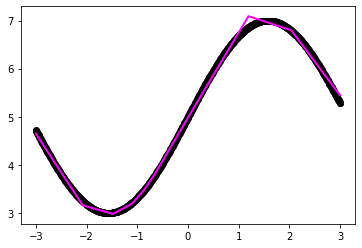

In [ ]:
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(inputs).detach().cpu().numpy(), color='magenta', linewidth=2, antialiased=True)
plt.show()

#TODO: Как сделать аппроксимацию идеальной не добавляя слоев и не меняя их число?

# Усложняем

In [ ]:
import pandas as pd

In [ ]:
def f(x):
    return -x * np.sin(x * np.pi) + np.exp(x / 2) - np.exp(0)

In [ ]:
y = f(x)

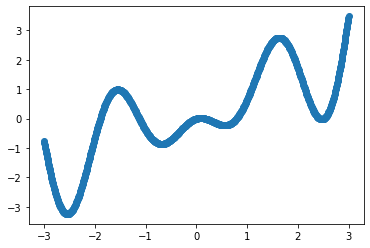

In [ ]:
plt.scatter(x, y)

In [ ]:
class linearRegression(torch.nn.Module):
    def __init__(self, input_dimension, output_dimension):
        # сначала запустим init аналогичный родительскому классу
        super(linearRegression, self).__init__() 
        # затем создадим свой первый слой на pytorch
        self.linear1 = torch.nn.Linear(input_dimension, 15)
        self.linear2 = torch.nn.Linear(15, output_dimension)

  # подсчет прогноза
    def forward(self, x):
        out = self.linear1(x)
        out = torch.nn.functional.relu(out)
        return self.linear2(out)

    def predict(self, test):
        return self.__call__(test)

In [ ]:
# инициализируем объект нашего класса, получив сперва размерности 
input_dimension = y.shape[1]
output_dimension = 1

model = linearRegression(input_dimension, output_dimension)

# используем GPU, чтобы все считалось быстрее
if torch.cuda.is_available():
    model.cuda()

In [ ]:
# определим, что мы будем оптимизировать и как
learning_rate = 1e-2

# будем минимизировать квадратичную функцию потерь
criterion = torch.nn.MSELoss()
# с помощью алгоритма ADAM (дальше посмотрим на разные алгоритмы оптимизации подробнее)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
epochs = 1000

# входные и выходные матрицы сконевртируем в тензоры
if torch.cuda.is_available():
    inputs = Variable(torch.from_numpy(x).type(torch.float).cuda())
    outputs = Variable(torch.from_numpy(y).type(torch.float).cuda())
else:
    inputs = Variable(torch.from_numpy(x))
    outputs = Variable(torch.from_numpy(y))

for epoch in range(epochs):
  # нужно обнулить градиенты, иначе будет их аккумулировать
  optimizer.zero_grad()

  # получим выход модели с учетом наличия входов
  training_predictions = model(inputs)

  # получим значение функции потерь для полученных прогнозов
  loss_value = criterion(training_predictions, outputs)
  # подсчитаем градиенты
  loss_value.backward()

  # сделаем апдейт параметров
  optimizer.step()
  
  if epoch % 100 == 1:
    print('epoch {}, loss {}'.format(epoch, loss_value.item()))

epoch 1, loss 3.270921230316162
epoch 101, loss 0.8832722306251526
epoch 201, loss 0.7486993074417114
epoch 301, loss 0.6624316573143005
epoch 401, loss 0.5777513980865479
epoch 501, loss 0.4925082325935364
epoch 601, loss 0.43404385447502136
epoch 701, loss 0.3967864215373993
epoch 801, loss 0.3651922047138214
epoch 901, loss 0.3123458921909332
epoch 1001, loss 0.29324835538864136
epoch 1101, loss 0.28121089935302734
epoch 1201, loss 0.27265188097953796
epoch 1301, loss 0.26617056131362915
epoch 1401, loss 0.26108986139297485
epoch 1501, loss 0.2569510042667389
epoch 1601, loss 0.2536584436893463
epoch 1701, loss 0.2509343922138214
epoch 1801, loss 0.24918191134929657
epoch 1901, loss 0.24671635031700134


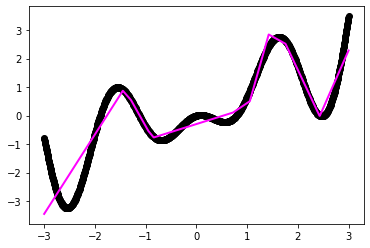

In [ ]:
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(inputs).detach().cpu().numpy(), color='magenta', linewidth=2, antialiased=True)
plt.show()

## Upgrade

In [ ]:
class linearRegression(torch.nn.Module):
    def __init__(self, input_dimension, output_dimension):
        # сначала запустим init аналогичный родительскому классу
        super(linearRegression, self).__init__() 
        # затем создадим свой первый слой на pytorch
        self.linear1 = torch.nn.Linear(input_dimension, 10)
        self.linear2 = torch.nn.Linear(10, output_dimension)

  # подсчет прогноза
    def forward(self, x):
        out = self.linear1(x)
        out = torch.nn.functional.tanh(out)
        return self.linear2(out)

    def predict(self, test):
        return self.__call__(test)

In [ ]:
# инициализируем объект нашего класса, получив сперва размерности 
input_dimension = y.shape[1]
output_dimension = 1

model = linearRegression(input_dimension, output_dimension)

# используем GPU, чтобы все считалось быстрее
if torch.cuda.is_available():
    model.cuda()

In [ ]:
# определим, что мы будем оптимизировать и как
learning_rate = 1e-2

# будем минимизировать квадратичную функцию потерь
criterion = torch.nn.MSELoss()
# с помощью алгоритма ADAM (дальше посмотрим на разные алгоритмы оптимизации подробнее)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
epochs = 1000

# входные и выходные матрицы сконевртируем в тензоры
if torch.cuda.is_available():
    inputs = Variable(torch.from_numpy(x).type(torch.float).cuda())
    outputs = Variable(torch.from_numpy(y).type(torch.float).cuda())
else:
    inputs = Variable(torch.from_numpy(x))
    outputs = Variable(torch.from_numpy(y))

for epoch in range(epochs):
  # нужно обнулить градиенты, иначе будет их аккумулировать
  optimizer.zero_grad()

  # получим выход модели с учетом наличия входов
  training_predictions = model(inputs)

  # получим значение функции потерь для полученных прогнозов
  loss_value = criterion(training_predictions, outputs)
  # подсчитаем градиенты
  loss_value.backward()

  # сделаем апдейт параметров
  optimizer.step()
  
  if epoch % 100 == 1:
    print('epoch {}, loss {}'.format(epoch, loss_value.item()))

epoch 1, loss 2.923943281173706
epoch 101, loss 0.9905673861503601


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch 201, loss 0.8315572738647461
epoch 301, loss 0.6407930254936218
epoch 401, loss 0.48321840167045593
epoch 501, loss 0.3939366936683655
epoch 601, loss 0.3329851031303406
epoch 701, loss 0.29204845428466797
epoch 801, loss 0.2546483278274536
epoch 901, loss 0.21419596672058105


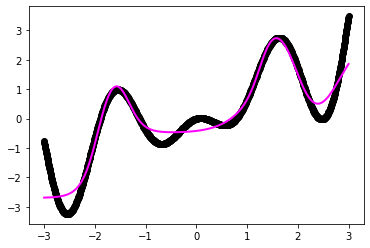

In [ ]:
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(inputs).detach().cpu().numpy(), color='magenta', linewidth=2, antialiased=True)
plt.show()

Давайте сделаем небольшую паузу и разберёмся, каким образом работает наша текущая конфигурация. Сеть представляет из себя линейную комбинацию гиперболических тангенсов:
<br>
f(x) = w1' * tanh(w1 * x + b1) +… + w5' * tanh(w5 * x + b5) + b

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


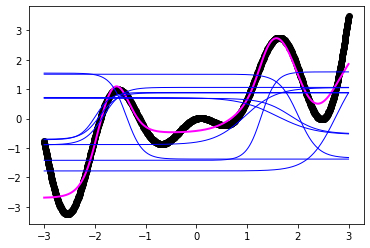

In [ ]:
# с помощью матрицы весом моделируем выход каждого отдельного нейрона перед суммацией
def tanh(x, i):
    w0 = model.linear1.weight.detach().cpu().numpy()
    w1 = model.linear2.weight.detach().cpu().numpy().T
    b0 = model.linear1.bias.detach().cpu().numpy()
    b1 = model.linear2.bias.detach().cpu().numpy()
    
    return w1[i][0] * np.tanh(w0[i][0] * x + b0[i]) + b1[0]

# рисуем функцию и приближение
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(inputs).detach().cpu().numpy(), color='magenta', linewidth=2, antialiased=True)

# рисуем разложение
for i in range(0, 10, 1):
    plt.plot(x, tanh(x, i), color='blue',
         linewidth=1)

plt.show()

In [ ]:
x = np.linspace(-10, 10, 1000).reshape(-1, 1)

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


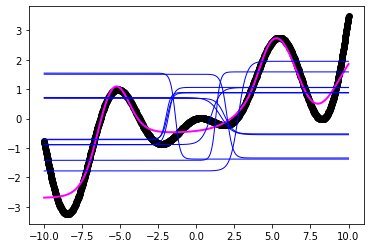

In [ ]:
# с помощью матрицы весом моделируем выход каждого отдельного нейрона перед суммацией
def tanh(x, i):
    w0 = model.linear1.weight.detach().cpu().numpy()
    w1 = model.linear2.weight.detach().cpu().numpy().T
    b0 = model.linear1.bias.detach().cpu().numpy()
    b1 = model.linear2.bias.detach().cpu().numpy()
    
    return w1[i][0] * np.tanh(w0[i][0] * x + b0[i]) + b1[0]

# рисуем функцию и приближение
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, model.predict(inputs).detach().cpu().numpy(), color='magenta', linewidth=2, antialiased=True)

# рисуем разложение
for i in range(0, 10, 1):
    plt.plot(x, tanh(x, i), color='blue',
         linewidth=1)

plt.show()

In [ ]:
[w.shape for w in model.parameters()]

[torch.Size([10, 1]), torch.Size([10]), torch.Size([1, 10]), torch.Size([1])]

TypeError: 'method' object is not subscriptable

In [ ]:
return w1[i][0] * np.tanh(w0[i] * x + w0[1][i]) + w1[1][0]

In [ ]:
w0[0]

array([-1.0935417], dtype=float32)

In [ ]:
b1=np.zeros(10)

In [ ]:
b1[9] = model.linear2.bias.detach().cpu().numpy()

In [ ]:
b1

array([0.08623865, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.08623865])

In [ ]:
model.linear2.weight

Parameter containing:
tensor([[ 0.3739, -0.0610,  1.7397, -1.0040, -0.6279, -0.8524,  1.4591, -0.8242,
         -0.9413,  1.0333]], device='cuda:0', requires_grad=True)

In [ ]:
w0[0]

array([-1.0935417], dtype=float32)

In [ ]:
w1[1][0]

-0.061049048

In [ ]:
w0.shape, w1.shape, b0.shape, b1.shape

((10, 1), (10, 1), (10,), (1,))

In [ ]:
w1[i][0] * np.tanh(w0[i][0] * x + b0[i]) + b1[0]

In [ ]:
w0 = model.linear1.weight.detach().cpu().numpy()
w1 = model.linear2.weight.detach().cpu().numpy().T
b0 = model.linear1.bias.detach().cpu().numpy()
b1 = model.linear2.bias.detach().cpu().numpy()

In [ ]:
model.linear2.weight.detach().cpu().numpy().T

array([[ 0.37391365],
       [-0.06104905],
       [ 1.7397275 ],
       [-1.0040377 ],
       [-0.6278751 ],
       [-0.8523965 ],
       [ 1.459133  ],
       [-0.8241983 ],
       [-0.94125825],
       [ 1.0333205 ]], dtype=float32)

In [ ]:
w1.shape

(1, 10)

In [ ]:
model.linear1.weight.detach().cpu().numpy()

array([[-1.0935417 ],
       [ 0.47026607],
       [ 3.5226896 ],
       [-3.785802  ],
       [-0.8060669 ],
       [ 1.9255171 ],
       [-4.159888  ],
       [-1.3623426 ],
       [ 1.5555637 ],
       [ 3.6163363 ]], dtype=float32)

In [ ]:
tanh(x, 0)

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [ ]:
w0[5][0]

tensor(1.9255, device='cuda:0', grad_fn=<SelectBackward>)

In [ ]:
model.predict(inputs).detach().cpu().numpy()

(1000, 1)

In [ ]:
np.apply_along_axis(lambda x: tanh(x, 1), 0, x)

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [ ]:
model.predict(inputs).detach().cpu().numpy()

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


array([[-2.52612758e+00],
       [-2.52791381e+00],
       [-2.52969599e+00],
       [-2.53147364e+00],
       [-2.53324699e+00],
       [-2.53501463e+00],
       [-2.53677654e+00],
       [-2.53853154e+00],
       [-2.54027987e+00],
       [-2.54202008e+00],
       [-2.54375243e+00],
       [-2.54547524e+00],
       [-2.54718876e+00],
       [-2.54889154e+00],
       [-2.55058312e+00],
       [-2.55226302e+00],
       [-2.55393028e+00],
       [-2.55558372e+00],
       [-2.55722284e+00],
       [-2.55884743e+00],
       [-2.56045580e+00],
       [-2.56204700e+00],
       [-2.56362081e+00],
       [-2.56517553e+00],
       [-2.56671119e+00],
       [-2.56822515e+00],
       [-2.56971812e+00],
       [-2.57118773e+00],
       [-2.57263374e+00],
       [-2.57405424e+00],
       [-2.57544827e+00],
       [-2.57681513e+00],
       [-2.57815289e+00],
       [-2.57946038e+00],
       [-2.58073688e+00],
       [-2.58197999e+00],
       [-2.58318901e+00],
       [-2.58436227e+00],
       [-2.5

In [ ]:
w0 = model.linear1.weight

In [ ]:
model.linear2.weight

Parameter containing:
tensor([[ 0.3739, -0.0610,  1.7397, -1.0040, -0.6279, -0.8524,  1.4591, -0.8242,
         -0.9413,  1.0333]], device='cuda:0', requires_grad=True)